1) Load in the dataset `https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv` into a pandas dataframe

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

In [96]:
data= pd.read_csv('https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv')

2) Convert `default` and `student` to categorical variables.

In [97]:
data['default'] = data['default'].astype('category')
data['student'] = data['student'].astype('category')

In [98]:
data.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


3) Make boxplots of all of the variables and a scatter plot of of (balance,income) with the color
of the outcome of `default` labeled red if yes and blue if no. 

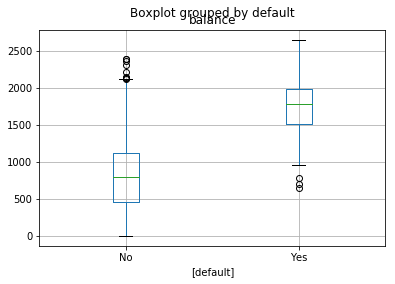

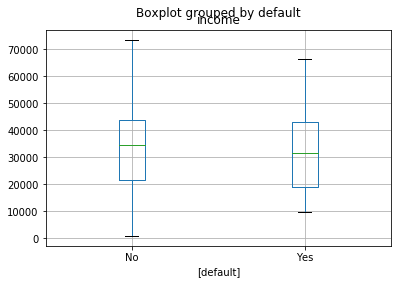

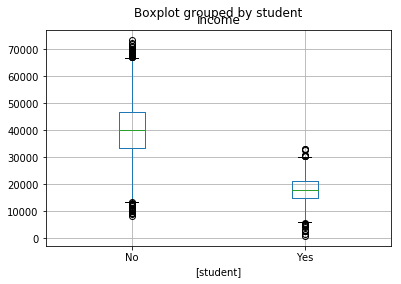

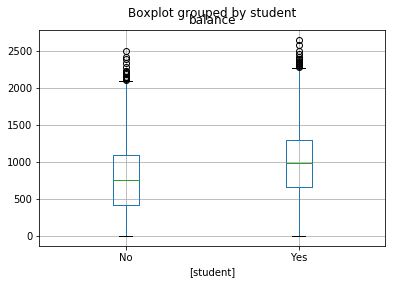

In [99]:
data[['balance','default']].boxplot(by='default')
data[['default','income']].boxplot(by='default')
data[['student','income']].boxplot(by='student')
data[['student','balance']].boxplot(by='student')

In [100]:
data['default']=data['default'].apply(lambda x: 1 if x=='Yes' else 0)
data['color']=data['default'].apply(lambda x: 'red' if x==1 else 'blue')

Text(0,0.5,'income')

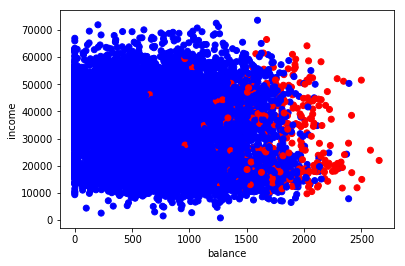

In [101]:
plt.scatter(data['balance'], data['income'],c=data['color'])
plt.xlabel('balance')
plt.ylabel('income')

4) Train a model to predict if a student defaults on their loan or not using LogisticRegression based soley
on the `balance` and `income` variables. Plot the decision boundary in the scatter plot you made in 3) and compute the AUC ROC.

In [102]:
X=data[['balance','income']]
y=data[['default']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [103]:
logisticRegr = LogisticRegression(penalty='l1')
logisticRegr.fit(X_train, y_train)
logisticRegr.score(X_test, y_test)
coef=logisticRegr.coef_
intercept=logisticRegr.intercept_

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [104]:
coef

array([[5.46527435e-03, 2.03150123e-05]])

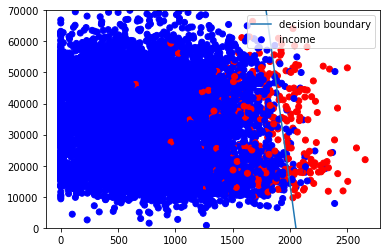

In [105]:
plt.scatter( data['balance'],data['income'],c=data['color'])
X1 = np.arange(0,2500)
X2 = -(coef[0][0] * X1 + intercept) / coef[0][1]
plt.plot(X1, X2, label='decision boundary')
plt.ylim(0,70000)
plt.legend()

In [106]:
from sklearn.metrics import roc_curve, auc
n_classes = y.shape[1]
y_score = logisticRegr.decision_function(X_test)
y_test=np.array(y_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print ("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.940933


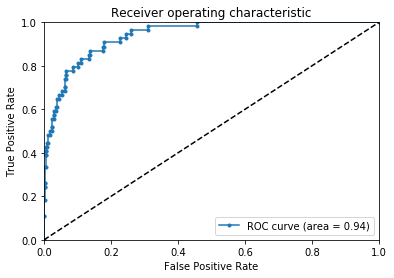

In [107]:
def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

5) Repeat 4) but with the student variable included. Optimize using Ridge regression and plot the ranking
of coefficients.  How does performance improve with the added variable?

Area under the ROC curve : 0.604383


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


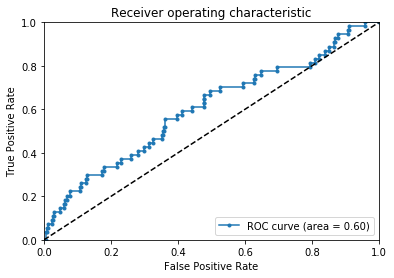

In [108]:
X = preprocessing.scale(X)
logisticRegr = LogisticRegression(penalty='l2',C=0.002)
logisticRegr.fit(X_train, y_train)
logisticRegr.score(X_test, y_test)
coef=logisticRegr.coef_
intercept=logisticRegr.intercept_
n_classes = y.shape[1]
y_score = logisticRegr.decision_function(X_test)
y_test=np.array(y_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print ("Area under the ROC curve : %f" % roc_auc)
def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

In [109]:
df_coeffs = pd.DataFrame(columns=['name','coef'])
df_coeffs['name']=['balance','income']
df_coeffs['coef']=[coef[0][0],coef[0][1]]

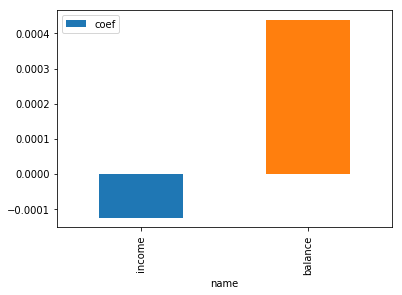

In [110]:
df_coeffs=df_coeffs.sort_values(['coef'])
df_coeffs.plot(x='name',y='coef',kind='bar')
plt.show()

In [111]:
data['student']=data['student'].apply(lambda x: 1 if x=='Yes' else 0)
X=data[['balance','income','student']]
X = preprocessing.scale(X)
y=data[['default']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [112]:
logisticRegr = LogisticRegression(penalty='l2',C=0.002)
logisticRegr.fit(X_train, y_train)
logisticRegr.score(X_test, y_test)
coef=logisticRegr.coef_
intercept=logisticRegr.intercept_

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [113]:
from sklearn.metrics import roc_curve, auc
n_classes = y.shape[1]
y_score = logisticRegr.decision_function(X_test)
y_test=np.array(y_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print ("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.942403


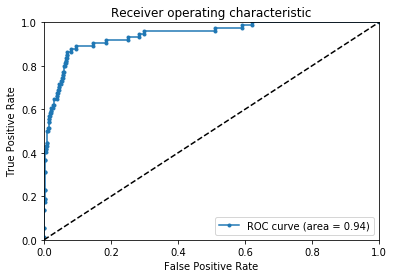

In [114]:
def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

In [115]:
df_coeffs = pd.DataFrame(columns=['name','coef'])
df_coeffs['name']=['balance','income','student']
df_coeffs['coef']=[coef[0][0],coef[0][1],coef[0][2]]

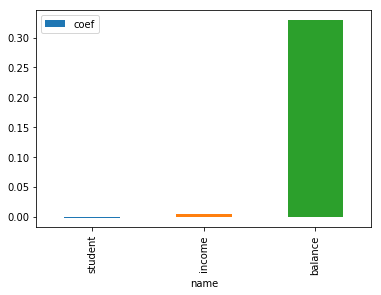

In [116]:
df_coeffs=df_coeffs.sort_values(['coef'])
df_coeffs.plot(x='name',y='coef',kind='bar')
plt.show()

### Form the outcome, the logistic regression performance increased from ROC 0.604383 to ROC 0.942403, which increased significantly with the adding of 'Student' column.

6) Using cross validation, check that the model you built in 5) is robust (generalizes to other random folds of the dataset).

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

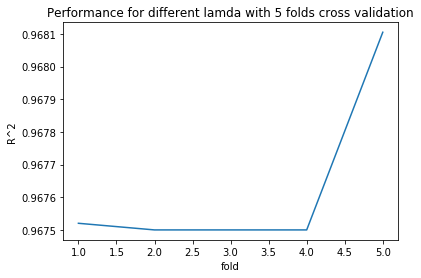

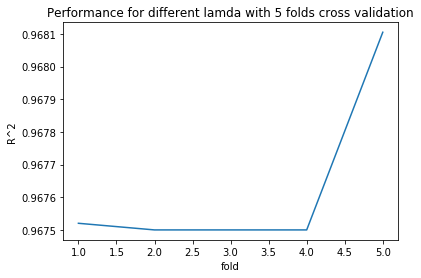

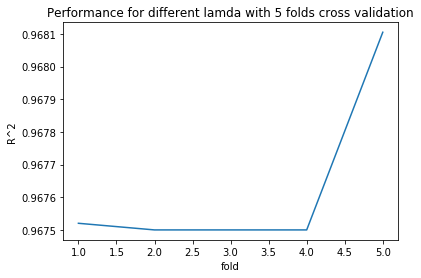

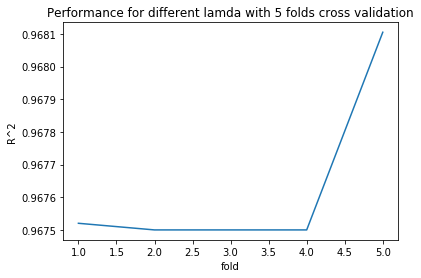

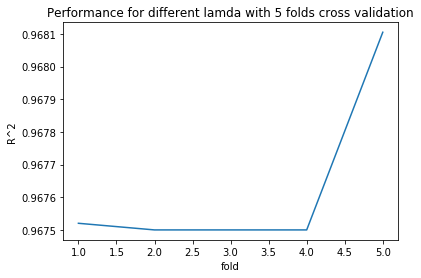

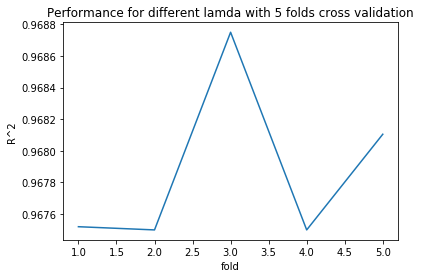

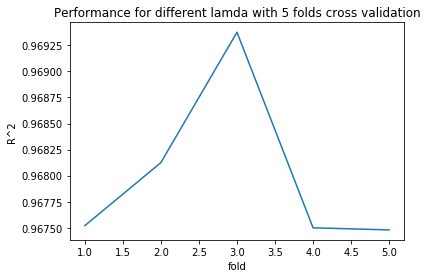

In [131]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
scores=['nan']*7
i=0
alphas=(0.001,0.002,0.003,0.005,0.01,0.015,0.02)
for alpha in alphas:
    regr = LogisticRegression(penalty='l2',C=alpha)
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    scores[i]= cross_val_score(regr, X_train, y_train, cv=5)
    i+=1
for i in range(0,7):  
    plt.plot(range(1,6),scores[i])
    plt.xlabel('fold')
    plt.ylabel('R^2')
    plt.title('Performance for different lamda with 5 folds cross validation' )
    plt.show()

#### By plotting the score for each fold, we can see our model is stable 

7) Train a Decision Tree classifier with maximum depth 5 and plot the decision tree. How does performance compare?

In [132]:
from sklearn.tree import DecisionTreeClassifier
# Create linear regression object
regr = DecisionTreeClassifier(max_depth=5,criterion='entropy')

# Train the model using the training sets
regr.fit(X_train, y_train)
regr.score(X_test,y_test)

0.9675

In [133]:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

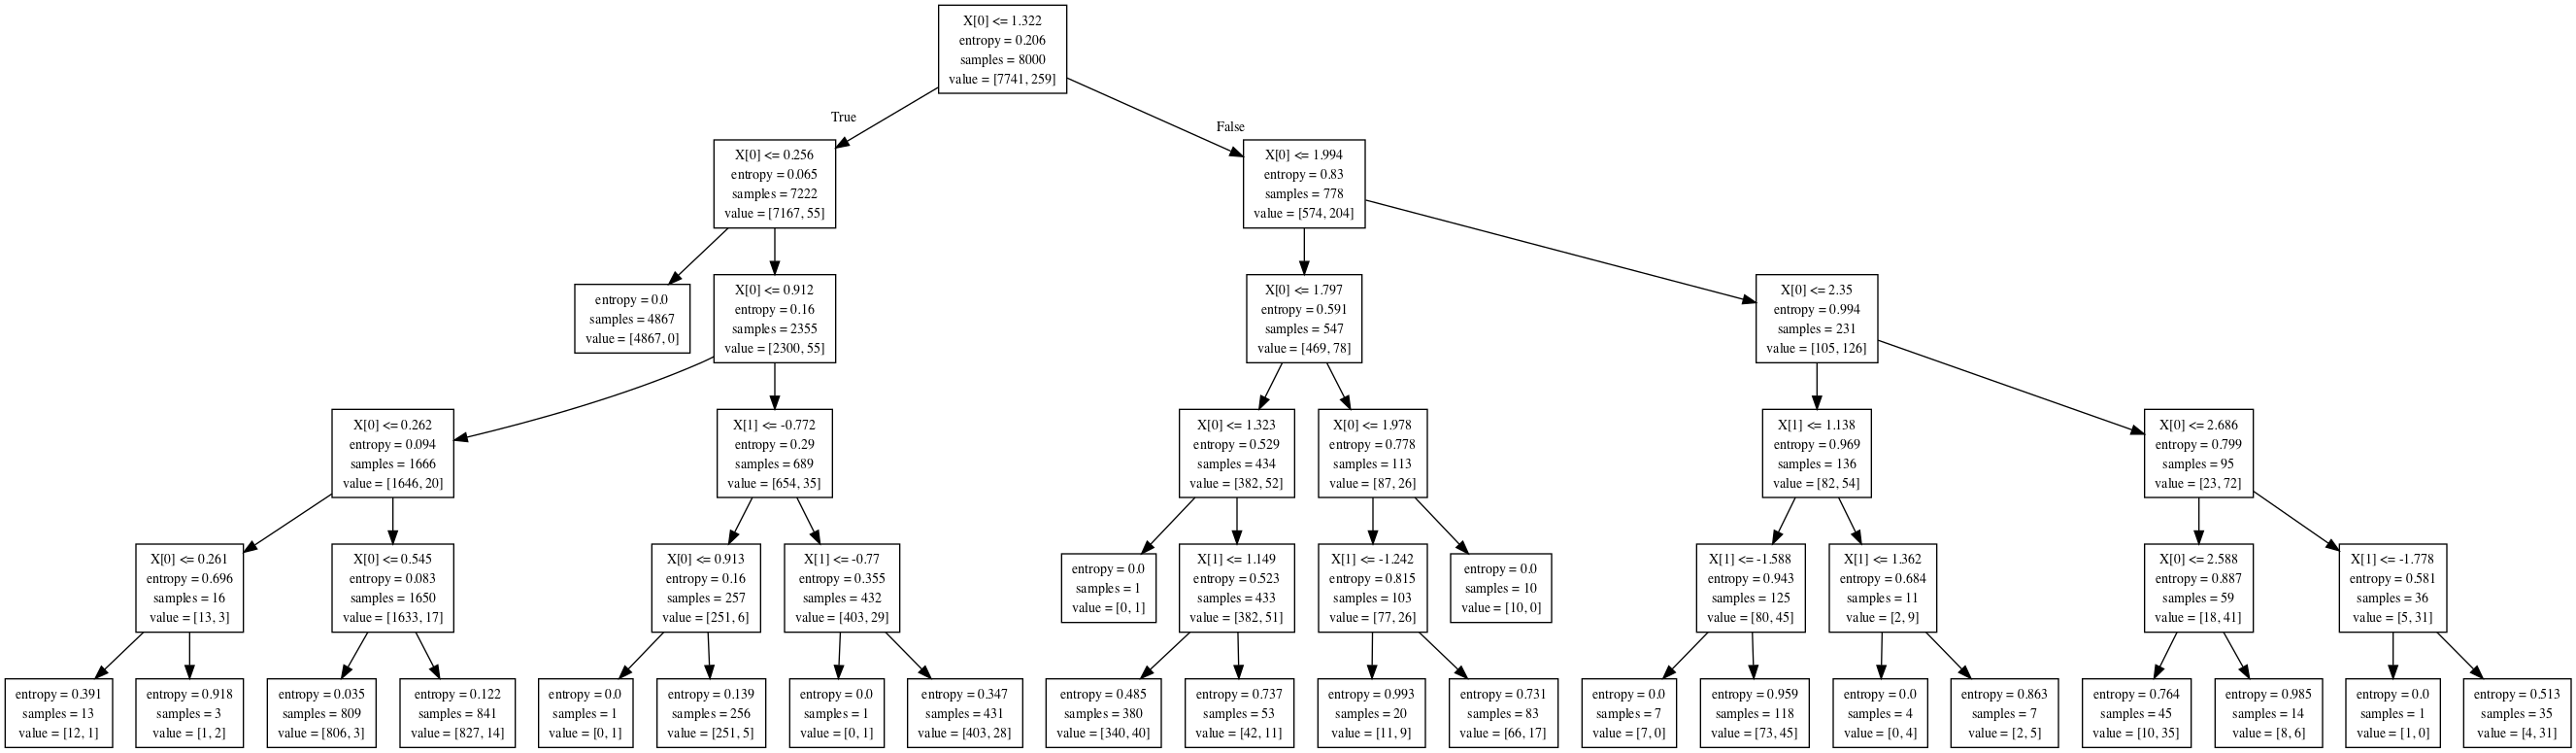

In [134]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image  
dot_data=export_graphviz(regr, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

8) Find the optimal decision tree depth and compute the AUC ROC. 

In [135]:
train_error= []
test_error= []
from sklearn.tree import DecisionTreeClassifier
a=0
for i in range(2,20):
    des = DecisionTreeClassifier(max_depth=i)
    des.fit(X_train, y_train)
    train_error.append(np.mean(np.array(y_train)!=des.predict(X_train)))
    test_error.append(np.mean(np.array(y_test)!=des.predict(X_test)))

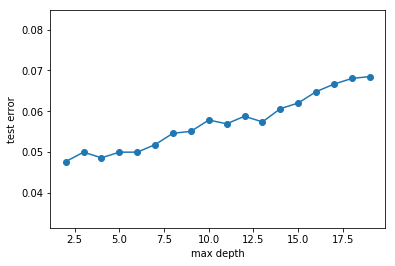

In [136]:
i= np.arange(2,20,1)
plt.scatter(i,test_error)
plt.plot(i, test_error)
plt.xlabel('max depth')
plt.ylabel('test error')
plt.show()

In [137]:
test_error==min(test_error)

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

### The best performance is with tree depth 2

In [138]:
from sklearn.tree import DecisionTreeClassifier
# Create linear regression object
regr = DecisionTreeClassifier(max_depth=2,criterion='entropy')

# Train the model using the training sets
regr.fit(X_train, y_train)
regr.score(X_test,y_test)

0.9705

In [139]:
n_classes = y.shape[1]
y_score = regr.predict_proba(X_test)[:,1]
y_test=np.array(y_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print ("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.931180


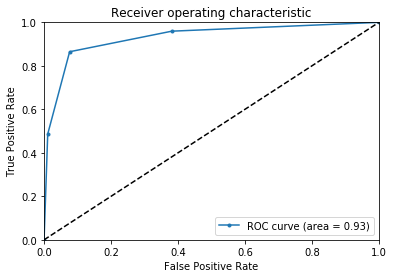

In [140]:
def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)